## Titanic 전처리1

In [1]:
# python ver / anaconda ver 맞는지 확인 필 

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings('ignore')

### train data 

In [3]:
import csv
train = pd.read_csv('train.csv')
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.shape

(891, 12)

#### test data

In [7]:
test = pd.read_csv('test.csv')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
test.shape

(418, 11)

In [11]:
# train 결측값
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
# test 결측값
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### 데이터 분포

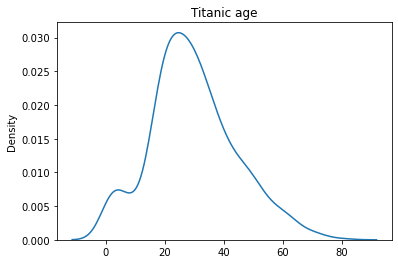

In [13]:
# Age



import seaborn as sns

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

# 커널 밀도함수 kernel density(kde)
# https://datascienceschool.net/01%20python/05.04%20%EC%8B%9C%EB%B3%B8%EC%9D%84%20%EC%82%AC%EC%9A%A9%ED%95%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%ED%8F%AC%20%EC%8B%9C%EA%B0%81%ED%99%94.html

In [14]:
# 시각화 할 때 좋을 것 같아
# https://steadiness-193.tistory.com/184

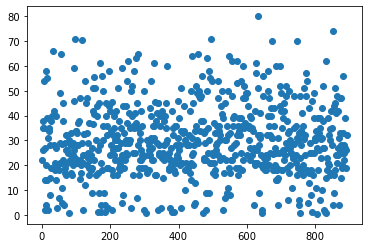

In [15]:
x = train['PassengerId'].values
y = train['Age'].values
plt.scatter(x,y)
plt.show()

In [16]:
# Age 편차
# 큰지 작은지 확인 불가
print(train['Age'].std())

14.526497332334044


In [17]:
# cabin 경우 값이 문자열이라 분포를 그리기 힘듬

In [18]:
# Embarked


# 결측값이 몇 개 없을 때, 최빈값만이 방법일까요?
# 문자열 -> 숫자형으로 만들어서 분포를 한 번 봅시다. 

train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# z = df['Embarked'].values

#sns.distplot(z, kde=True, rug=True)
#plt.title('Titanic embarked')
#plt.show()

# ked(밀도), rug(위치) 동시 
# 곧 없어진다고 

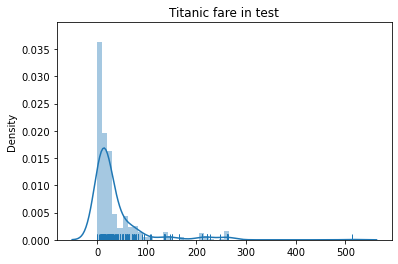

In [20]:
# fare

y1 = test['Fare'].values

sns.distplot(y1, kde=True, rug=True)
plt.title('Titanic fare in test')
plt.show()

#### 결측치 처리

Age -> 평균 29.69

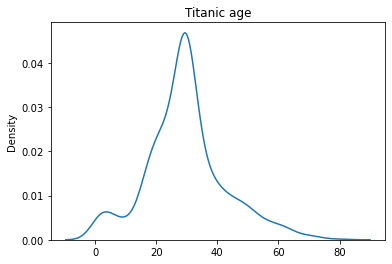

In [21]:
train['Age'] = train['Age'].fillna(29.69)     # train
test['Age'] = test['Age'].fillna(29.69)   # test

x = train['Age'].values

sns.kdeplot(x)
plt.title('Titanic age')

plt.show()

Embarked -> 최빈값 S(0)

In [22]:
train['Embarked'] = train['Embarked'].fillna('S')

Fare -> 최빈값 8.05

In [23]:
fare = train['Fare']
fare.mode()

0    8.05
dtype: float64

In [24]:
test['Fare'] = test['Fare'].fillna(8.05)

#### 새 변수 생성

In [25]:
# age_gr / married / f_nm / f_ox 

Age > Age_gr

In [26]:
# 16세~ 성인 간주
# https://www.encyclopedia-titanica.org/community/threads/children-on-the-titanic.20096/

In [27]:
def age_gr(x):
    if x < 5 :
       return 'very young'
    if 5<=x<10:
       return 'young'
    if 10<=x<16:
       return 'children'
    if 16<=x<20:
       return 's_adult'    # 16세~ 성인 간주 
    if 20<=x<30:
       return '20s'
    if 30<=x<40:
       return '30s'
    if 40<=x<50:
       return '40s'
    if 50<=x<60:
       return '50s'
    if 60<=x<70:
       return '60s'
    if 70<=x<80:
       return '70s'
    if 80<=x<90:
       return '80s'


In [28]:
train['Age_gr'] = train['Age'].apply(lambda x:age_gr(x))
test['Age_gr'] = test['Age'].apply(lambda x:age_gr(x))

f_nm

In [29]:
train['F_nm'] = train['SibSp'] + train['Parch']
test['F_nm'] = test['SibSp'] + test['Parch']

f_ox

In [30]:
def f_ox(x):
    if x == 0:
        return 0
    if x >= 1:
        return 1   

In [31]:
train['F_ox'] = train['F_nm'].apply(lambda x: f_ox(x))
test['F_ox'] = test['F_nm'].apply(lambda x: f_ox(x))

Name > Married

In [32]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,20s,1,1


In [33]:
train['Name'] = train['Name'].str.split(',').str[1]
train['Name'] = train['Name'].str.split('.').str[0]
train['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [34]:
n = [' Don',' Rev', ' Mme',' Mlle', ' Col', ' Capt', ' the Countess', ' Jonkgeer']

for i in n:
    print(train[train['Name']==i]['Name'])

# 총 14명 

30     Don
Name: Name, dtype: object
149     Rev
150     Rev
249     Rev
626     Rev
848     Rev
886     Rev
Name: Name, dtype: object
369     Mme
Name: Name, dtype: object
641     Mlle
710     Mlle
Name: Name, dtype: object
647     Col
694     Col
Name: Name, dtype: object
745     Capt
Name: Name, dtype: object
759     the Countess
Name: Name, dtype: object
Series([], Name: Name, dtype: object)


In [35]:
condition = train['Name']==' Rev'
train[condition]

#  구글 영어번역 검색 '신부님'
# 실제 최소 27세~ 의 남성, sibsp/parch가 0~1명, 2class(?)
# 미혼으로.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox
149,150,0,2,Rev,male,42.0,0,0,244310,13.000,NaN,S,40s,0,0
150,151,0,2,Rev,male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,50s,0,0
249,250,0,2,Rev,male,54.0,1,0,244252,26.000,NaN,S,50s,1,1
626,627,0,2,Rev,male,57.0,0,0,219533,12.350,NaN,Q,50s,0,0
848,849,0,2,Rev,male,28.0,0,1,248727,33.000,NaN,S,20s,1,1
886,887,0,2,Rev,male,27.0,0,0,211536,13.000,NaN,S,20s,0,0


In [36]:
# 미혼(0)
# Miss      미혼
# Master    미혼 남성(29살도 있음)
# Rev   신부님
# Mlle  미혼여성(마드모아젤) = Miss(프랑스 호)

# 기혼(1)
# Mr        기혼
# Mrs       기혼

In [37]:
# X 불명(9) -> 그 외.. 
# Don           도람뿌(남성형이름), 두목(?)
# Mme           N
# Col           N
# Capt          캡틴 1명, 기혼자임
# the Countess  백작부인(백작부인 자체는 직위인데 미/기혼 알 수X, 다만 이 사람은 이후에 결혼함)
# Jonkgeer      귀족직함 (가장 낮은 귀족직함) 결혼여부 불명
# Dr            박사
# Ms            기혼여부 상관없이
# Major         군대 직위
# Lady          당시 기혼자이나 귀족 출신 직위 중 1인듯함
# Sir           영국 준남작

In [38]:
test['Name'] = test['Name'].str.split(',').str[1]
test['Name'] = test['Name'].str.split('.').str[0]
test['Name'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Ms', ' Col', ' Rev', ' Dr',
       ' Dona'], dtype=object)

In [39]:
my = [' Mr', ' Mrs']
mn = [' Miss', ' Master', ' Rev', ' Mlle']

train['Married'] = train['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)  
test['Married'] = test['Name'].apply(lambda x : 0 if x in my else 1 if x in mn else 9)      

#### 문자열 -> 숫자형으로 인코딩

In [40]:
# sex / embarked / age_gr

# 원핫인코딩, 레이블 인코딩을 꼭 해줘야 하나? 탑승항구 한 것처럼 하기에는 좀 그런가..
# 원핫 인코딩으로 해주어야 하나? 
# 상관관계 산점도가 잘 안 보이는 느낌 

In [41]:
# sex, embarked 레이블 인코딩 
 
train['Sex'] = LabelEncoder().fit_transform(train.Sex)  # 0 여성 / 1 남성 
test['Sex'] = LabelEncoder().fit_transform(test.Sex)

train['Embarked'] = LabelEncoder().fit_transform(train.Embarked)
test['Embarked'] = LabelEncoder().fit_transform(test.Embarked)

train['Age_gr'] = LabelEncoder().fit_transform(train.Age_gr)
test['Age_gr'] = LabelEncoder().fit_transform(test.Age_gr)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_gr,F_nm,F_ox,Married
0,1,0,3,Mr,1,22.0,1,0,A/5 21171,7.2500,NaN,2,0,1,1,0
1,2,1,1,Mrs,0,38.0,1,0,PC 17599,71.2833,C85,0,1,1,1,0
2,3,1,3,Miss,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,0,0,0,1
3,4,1,1,Mrs,0,35.0,1,0,113803,53.1000,C123,2,1,1,1,0
4,5,0,3,Mr,1,35.0,0,0,373450,8.0500,NaN,2,1,0,0,0


#### 필요없는 변수 drop

In [42]:
# cabin, ticket, Name, Age, SibSp, Parch

train = train.drop(['PassengerId', 'SibSp', 'Parch', 'Cabin', 'Ticket', 'Name','Age'], axis=1)
test = test.drop(['Cabin', 'SibSp', 'Parch','Ticket','Name', 'Age'], axis=1)

In [43]:
train.head()

,Survived,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,0,3,1,7.2500,2,0,1,1,0
1,1,1,0,71.2833,0,1,1,1,0
2,1,3,0,7.9250,2,0,0,0,1
3,1,1,0,53.1000,2,1,1,1,0
4,0,3,1,8.0500,2,1,0,0,0


In [44]:
test.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Age_gr,F_nm,F_ox,Married
0,892,3,1,7.8292,1,1,0,0,0
1,893,3,0,7.0000,2,2,1,1,0
2,894,2,1,9.6875,1,4,0,0,0
3,895,3,1,8.6625,2,0,0,0,0
4,896,3,0,12.2875,2,0,2,1,0


#### 변수 간 관계

In [45]:
# sns.pairplot(train,diag_kind='hist')
# plt.show()

In [46]:
# import warnings 
# warnings.filterwarnings('ignore')

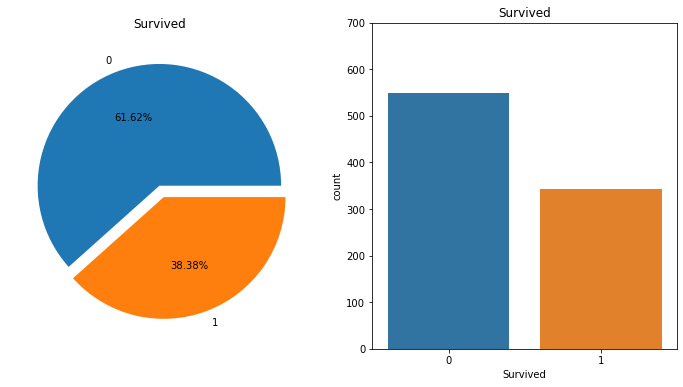

In [47]:
f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.ylim(0,700)
plt.show()

[Text(0.5, 1.0, 'Married')]

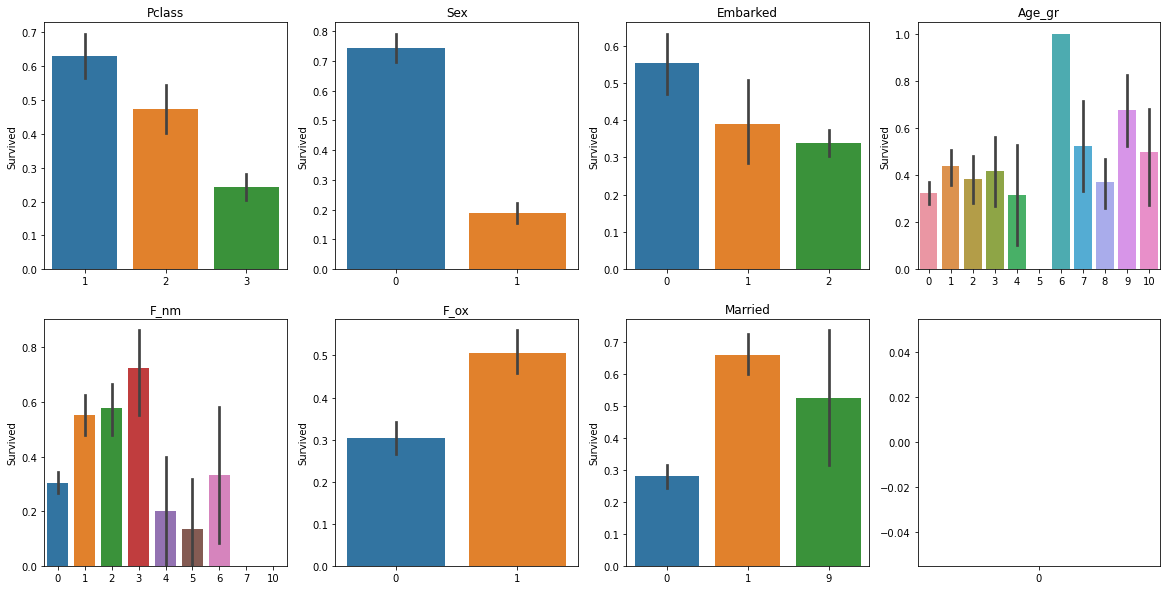

In [48]:
# 변수별 평균 생존률

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
fig.set_size_inches(20,10)

sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
sns.barplot(x='Embarked', y='Survived',data= train, ax=ax3)
sns.barplot(x='Age_gr', y='Survived',data= train, ax=ax4)
sns.barplot(x='F_nm', y='Survived',data= train, ax=ax5)
sns.barplot(x='F_ox', y='Survived',data= train, ax=ax6)
sns.barplot(x='Married', y='Survived',data= train, ax=ax7)
sns.barplot(ax=ax8)

ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax5.set(xlabel='')
ax6.set(xlabel='')
ax7.set(xlabel='')

ax1.set(title="Pclass")
ax2.set(title="Sex")
ax3.set(title="Embarked")
ax4.set(title="Age_gr")
ax5.set(title="F_nm")
ax6.set(title="F_ox")
ax7.set(title="Married")



In [49]:
# sharey=True : y축 동일화 

#### 분류 모델

In [50]:
train['Survived'].unique()

array([0, 1], dtype=int64)

train, test split

In [51]:
X = train.iloc[:,1:].values
y = train['Survived']
X.shape, y.shape

((891, 8), (891,))

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((712, 8), (179, 8), (712,), (179,))

분류

In [53]:
# #test_size=0.2 

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.2, random_state=2021
# )
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

# print(f'test_size = 0.2일때')


# from sklearn.tree import DecisionTreeClassifier
# D=DecisionTreeClassifier(random_state=2021)
# D.fit(X_train, y_train)
# print(f'결정트리의 성능은 {D.score(X_test, y_test).round(4)}')

# from sklearn.svm import SVC
# svc = SVC(random_state=2021)
# svc.fit(X_train, y_train)
# print(f'SVM의 성능은 {svc.score(X_test, y_test).round(4)}')

# from sklearn.neighbors import KNeighborsClassifier
# knc = KNeighborsClassifier(n_neighbors=3)                   # n_neighbors 의미 
# knc.fit(X_train, y_train)
# print(f'KNN의 성능은 {knc.score(X_test, y_test).round(4)}') # knn은 랜덤 스테이트 안되나? 

# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(random_state=2021)
# rfc.fit(X_train, y_train)
# print(f'랜덤포레스트의 성능은 {rfc.score(X_test, y_test).round(4)}')

# from sklearn.linear_model import LogisticRegression
# lgr = LogisticRegression(random_state=2021)
# lgr.fit(X_train, y_train)
# print(f'로지스틱 회귀의 성능은 {lgr.score(X_test, y_test).round(4)}')






In [54]:
# #test_size=0.4

# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, stratify=y, test_size=0.4, random_state=2021)
# print(f'test_size = 0.4일때 {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')


# from sklearn.tree import DecisionTreeClassifier
# D=DecisionTreeClassifier(random_state=2021)
# D.fit(X_train, y_train)
# print(f'결정트리의 성능은 {D.score(X_test, y_test).round(4)}')

# from sklearn.svm import SVC
# svc = SVC(random_state=2021)
# svc.fit(X_train, y_train)
# print(f'SVM의 성능은 {svc.score(X_test, y_test).round(4)}')

# from sklearn.neighbors import KNeighborsClassifier
# knc = KNeighborsClassifier(n_neighbors=3)
# knc.fit(X_train, y_train)
# print(f'KNN의 성능은 {knc.score(X_test, y_test).round(4)}')

# from sklearn.ensemble import RandomForestClassifier
# rfc = RandomForestClassifier(random_state=2021)
# rfc.fit(X_train, y_train)
# print(f'랜덤포레스트의 성능은 {rfc.score(X_test, y_test).round(4)}')

# from sklearn.linear_model import LogisticRegression
# lgr = LogisticRegression(random_state=2021)
# lgr.fit(X_train, y_train)
# print(f'로지스틱 회귀의 성능은 {lgr.score(X_test, y_test).round(4)}')

In [55]:
# random_State로 고정했는데 왜 ?? 값이 바뀌지?

In [56]:
# 분류 - knn / naive bayse / svm / decision tree/ logistic regression
# 앙상블 - stacking / random forest / bagging / boosting
# (비)지도/강화 학습알고리즘의 업그레이드 : 앙상블
# what is GridSearchCV? 

In [57]:
# 정규화 해야하는지 

In [58]:
# 나이브 베이즈
# https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-1%EB%82%98%EC%9D%B4%EB%B8%8C-%EB%B2%A0%EC%9D%B4%EC%A6%88-%EB%B6%84%EB%A5%98-Naive-Bayes-Classification

In [59]:
# 랜덤포레스트, 로지스틱 회귀 사용 

print(f'랜덤포레스트는')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.15, random_state=2021)
print(f'test_size = 0.1일때')
print(f'X, y shape은 {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')
a = []

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
for i in range(0,10):
    rfc.fit(X_train, y_train)
    a.append(rfc.score(X_test, y_test).round(4))
print(a)
sum = 0
for i in a:
    sum+= i
print(f'평균 성능은 {(sum/len(a)).round(4)}')


랜덤포레스트는
test_size = 0.1일때
X, y shape은 ((757, 8), (134, 8), (757,), (134,))
[0.8284, 0.8284, 0.8134, 0.8134, 0.8134, 0.8209, 0.8209, 0.8134, 0.8209, 0.8358]
평균 성능은 0.8209


In [60]:
# 랜덤포레스트, 로지스틱 회귀 사용 

print(f'로지스틱 회귀는')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.4, random_state=2021)
print(f'test_size = 0.1일때')
print(f'X, y shape은 {X_train.shape, X_test.shape, y_train.shape, y_test.shape}')
a = []

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=500)
for i in range(0,10):
    lgr.fit(X_train, y_train)
    a.append(lgr.score(X_test, y_test).round(4))
print(a)

sum = 0
for i in a:
    sum+= i
print(f'평균 성능은 {(sum/len(a)).round(5)}')

로지스틱 회귀는
test_size = 0.1일때
X, y shape은 ((534, 8), (357, 8), (534,), (357,))
[0.7899, 0.7899, 0.7899, 0.7899, 0.7899, 0.7899, 0.7899, 0.7899, 0.7899, 0.7899]
평균 성능은 0.7899


In [61]:
# lrg는 test_size 0.3일 때 가장 성능이 높고(0.8134)
# max_iter=500으로 잡아서 에러 없애줌
# 여전히 반복문임에도 같은 값이 나옴 

#### 예측

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=2021)

랜덤포레스트

In [72]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=2021)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2021,
 'verbose': 0,
 'warm_start': False}

In [89]:
params = {
    'n_estimators': [130],
    'max_depth': [8],
    'min_samples_leaf' :[2],
    'min_samples_split' : [5]
}
# n_estimator = 100

In [90]:
from sklearn.model_selection import GridSearchCV
grid_rfc = GridSearchCV(rfc, param_grid=params, scoring ='accuracy', cv=5 )
grid_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=2021),
             param_grid={'max_depth': [8], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [130]},
             scoring='accuracy')

In [ ]:
stop

NameError: name 'stop' is not defined

In [75]:
# 1
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 110}
0.8443721243407024


In [91]:
# 2
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 130}
0.8413870497138369


In [88]:
# 3
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 140}
0.8413870497138369


In [ ]:
# 4
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.8385009356840343


In [ ]:
# 5
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}
0.8385009356840343


In [92]:
best_clf = grid_rfc.best_estimator_

In [93]:
pred = best_clf.predict(test.iloc[:,1:])
# np.arr 형태

In [94]:
pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
# min_sample_split 노드 분할의 최소한 데이터 수 / 작게 설정할 수록 과적합 가능성 생긴단 말 듣고 sample을 더 높게
# 실제로 정확도가 올라갔음 
# 예측 성능은 더 낮았지만! 

print(f'min_sample_split을 크게 설정했을 때')
print()
print(f'test_size = 0.25')
print(f'max_depth : 6 , min_samples_split = 4')
print(f'예측 성능 0.83988 / 캐글 0.78229')

# result = pd.DataFrame({
#     'PassengerId': test['PassengerId'],
#     'Survived' : pred
# })

# result.to_csv('06.csv', index=False)

min_sample_split을 크게 설정했을 때

test_size = 0.25
max_depth : 6 , min_samples_split = 4
예측 성능 0.83988 / 캐글 0.78229


In [ ]:
# 여기서 느꼈던 건..
# 학습 부분 -> train 데이터의 예측성능만 보고 정확도를 판단해서는 안되겠구나. 과적합의 가능성을 항상 열어두고 파라미터 조정을 다양하게 시도해야 겠다. 

In [ ]:
# one-hot 인코딩
# randomizedsearchcv 
# catboost 인코딩 하지 않아도? 카데고리 할 수 있는... 시도해보면 좋겟다. 


params 추가 

In [ ]:
print(f'min_sample_split을 크게 설정했을 때')
print()
print(f'test_size = 0.2')
print(f'max_depth : 9 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.8385 / 캐글 0.77511')

# result = pd.DataFrame({
#     'PassengerId': test['PassengerId'],
#     'Survived' : pred
# })

# result.to_csv('08.csv', index=False)

min_sample_split을 크게 설정했을 때

test_size = 0.2
max_depth : 9 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.8385 / 캐글 0.


In [ ]:
print(f'min_sample_split을 크게 설정했을 때')
print()
print(f'test_size = 0.25')
print(f'max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.84588 / 캐글 0.78229')

# result = pd.DataFrame({
#     'PassengerId': test['PassengerId'],
#     'Survived' : pred
# })

# result.to_csv('07.csv', index=False)

min_sample_split을 크게 설정했을 때

test_size = 0.25
max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.84588 / 캐글 0.78229


n_estimators

In [96]:
# 110

print(f'test_size = 0.25')
print(f'n_estimators = 110')
print(f'max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.84437 / 캐글 0.77751')

# result = pd.DataFrame({
#     'PassengerId': test['PassengerId'],
#     'Survived' : pred
# })

# result.to_csv('110.csv', index=False)


test_size = 0.25
n_estimators = 110
max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.84437 / 캐글 0.77751


In [95]:
# 130

print(f'test_size = 0.25')
print(f'n_estimators = 130')
print(f'max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5')
print(f'예측 성능 0.84139 / 캐글 0.77272')


# result = pd.DataFrame({
#     'PassengerId': test['PassengerId'],
#     'Survived' : pred
# })

# result.to_csv('130.csv', index=False)

test_size = 0.25
max_depth : 8 , min_samples_leaf= 2, min_samples_split = 5
예측 성능 0.84139 / 캐글 0.
